In [1]:
import os
from trainy_context import train
import toy
import numpy as np
import datetime
from model import VAE_Solver,RL_Solver
from toy import ContextProblem

/home/mvmacfarlane/miniconda3/envs/CVAE_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class Namespace:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)


In [3]:
#Create config

config = Namespace(

    #Running Settings
    output_path = "",
    device = "cuda",
    model_path = None,

    #Training
    batch_size = 512,
    epoch_size = 512*8,  #102400
    generate_solutions_batch_size = 512*8,
    nb_epochs = 200 ,
    lr = 1e-3, #1e-4
    lr_imp = 1e-3,
    lr_diff = 1e-3,

    #Loss
    KLD_weight = 1e-2, #0.001

    #Problem Statement
    variation = True,
    problem = "smooth_1",  #Not relevant anymore

    #VAE training
    weighting = True,
    weighting_temp = 1,
    sample_num = 4,  #To estimate advantage

    #Problem sampling
    sample_uniform = True,

    #Decoding Method
    testing_decoding_greedy = True,  #Need to specify all the different decoding decisions

    #Diffusion
    diffusion_steps = 600,
    diffusion_loops = 1,

    #Evaluation search budget
    test_retry_num = 2,
    evaluation_num = 512*8,

    num_var = 2,
    deg = 2,

    latent_size = 2,   #We should make this larger


)


In [4]:

exp_name = "pure_vae_sample_uniform_testing_14"
#exp_name = "problems:1_baseline:4_uniform:5_epochs"


config.exp_name = exp_name
run_id = np.random.randint(10000, 99999)
now = datetime.datetime.now()

if config.output_path == "":
    config.output_path = os.getcwd()
    config.output_path_fixed = config.output_path
    config.output_path = os.path.join(config.output_path,"experiment_info", config.exp_name + ":_" + str(now.day) + "." + str(now.month) +"." + str(now.year) + "_" + str(run_id))

    os.makedirs(os.path.join(config.output_path, "models"))
    os.makedirs(os.path.join(config.output_path, "latent_images"))

Finding Optimal Solutions


100%|██████████| 4096/4096 [00:08<00:00, 484.75it/s]
2023-02-23 08:13:22.749147: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-23 08:13:22.872843: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-23 08:13:23.385127: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-23 08:13:23.385173: W tensorflow/compiler/xl

Epoch:1
Sampling Solutions


100%|██████████| 1/1 [00:00<00:00,  2.06it/s]


Updating


100%|██████████| 32/32 [00:00<00:00, 62.51it/s]


Diffusion Loss:0.9916821997612715 Loop:0
Reconstruction Loss:3801.8869247436523 Loop:0
Change Loss:917.3538990020752 Loop:0
Mean Squared Change Error:2.9239735305309296 Loop:0
Evaluating


100%|██████████| 2/2 [00:00<00:00,  2.15it/s]


Plotting Data
Epoch:2
Sampling Solutions


100%|██████████| 1/1 [00:00<00:00,  2.10it/s]


Updating


100%|██████████| 32/32 [00:00<00:00, 62.76it/s]


Diffusion Loss:0.9990910217165947 Loop:0
Reconstruction Loss:3786.2425842285156 Loop:0
Change Loss:910.6871109008789 Loop:0
Mean Squared Change Error:1.2076241578906775 Loop:0
Evaluating


100%|██████████| 2/2 [00:00<00:00,  2.14it/s]


Plotting Data
Epoch:3
Sampling Solutions


100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


Updating


100%|██████████| 32/32 [00:00<00:00, 57.87it/s]


Diffusion Loss:0.9954102821648121 Loop:0
Reconstruction Loss:3748.149238586426 Loop:0
Change Loss:895.3791770935059 Loop:0
Mean Squared Change Error:0.8054703064262867 Loop:0
Evaluating


100%|██████████| 2/2 [00:00<00:00,  2.02it/s]


Plotting Data
Epoch:4
Sampling Solutions


100%|██████████| 1/1 [00:00<00:00,  2.00it/s]


Updating


100%|██████████| 32/32 [00:00<00:00, 59.60it/s]


Diffusion Loss:1.0028011985123158 Loop:0
Reconstruction Loss:3717.4494018554688 Loop:0
Change Loss:899.4823417663574 Loop:0
Mean Squared Change Error:0.7998541574925184 Loop:0
Evaluating


100%|██████████| 2/2 [00:00<00:00,  2.15it/s]


Plotting Data
Epoch:5
Sampling Solutions


100%|██████████| 1/1 [00:00<00:00,  2.01it/s]


Updating


100%|██████████| 32/32 [00:00<00:00, 72.34it/s]


Diffusion Loss:1.0036930013448 Loop:0
Reconstruction Loss:3700.4101638793945 Loop:0
Change Loss:897.1688499450684 Loop:0
Mean Squared Change Error:2.595301892608404 Loop:0
Evaluating


100%|██████████| 2/2 [00:00<00:00,  2.11it/s]


Plotting Data
Epoch:6
Sampling Solutions


100%|██████████| 1/1 [00:00<00:00,  2.10it/s]


Updating


100%|██████████| 32/32 [00:00<00:00, 56.12it/s]


Diffusion Loss:0.994677122682333 Loop:0
Reconstruction Loss:3680.7745208740234 Loop:0
Change Loss:895.7499256134033 Loop:0
Mean Squared Change Error:3.355939071625471 Loop:0
Evaluating


100%|██████████| 2/2 [00:00<00:00,  2.10it/s]


Plotting Data
Epoch:7
Sampling Solutions


100%|██████████| 1/1 [00:00<00:00,  2.09it/s]


Updating


100%|██████████| 32/32 [00:00<00:00, 61.94it/s]


Diffusion Loss:1.0005377065390348 Loop:0
Reconstruction Loss:3645.778778076172 Loop:0
Change Loss:907.3263816833496 Loop:0
Mean Squared Change Error:3.254617139697075 Loop:0
Evaluating


100%|██████████| 2/2 [00:00<00:00,  2.15it/s]


Plotting Data
Epoch:8
Sampling Solutions


100%|██████████| 1/1 [00:00<00:00,  1.98it/s]


Updating


100%|██████████| 32/32 [00:00<00:00, 66.91it/s]


Diffusion Loss:0.9955787267535925 Loop:0
Reconstruction Loss:3576.6622924804688 Loop:0
Change Loss:899.1981468200684 Loop:0
Mean Squared Change Error:3.151876673102379 Loop:0
Evaluating


100%|██████████| 2/2 [00:00<00:00,  2.12it/s]


Plotting Data
Epoch:9
Sampling Solutions


100%|██████████| 1/1 [00:00<00:00,  2.08it/s]


Updating


100%|██████████| 32/32 [00:00<00:00, 64.00it/s]


Diffusion Loss:0.9980418495833874 Loop:0
Reconstruction Loss:3489.895751953125 Loop:0
Change Loss:894.1561660766602 Loop:0
Mean Squared Change Error:1.9199889786541462 Loop:0
Evaluating


100%|██████████| 2/2 [00:00<00:00,  2.12it/s]


Plotting Data
Epoch:10
Sampling Solutions


100%|██████████| 1/1 [00:00<00:00,  2.07it/s]


Updating


100%|██████████| 32/32 [00:00<00:00, 63.80it/s]


Diffusion Loss:1.0005390476435423 Loop:0
Reconstruction Loss:3416.2812271118164 Loop:0
Change Loss:903.8567409515381 Loop:0
Mean Squared Change Error:1.3584856390953064 Loop:0
Evaluating


100%|██████████| 2/2 [00:00<00:00,  2.07it/s]


Plotting Data
Epoch:11
Sampling Solutions


100%|██████████| 1/1 [00:00<00:00,  2.08it/s]


Updating


100%|██████████| 32/32 [00:00<00:00, 65.52it/s]


Diffusion Loss:0.9983585346490145 Loop:0
Reconstruction Loss:3379.435989379883 Loop:0
Change Loss:897.127649307251 Loop:0
Mean Squared Change Error:1.286081861704588 Loop:0
Evaluating


100%|██████████| 2/2 [00:00<00:00,  2.11it/s]


Plotting Data


KeyboardInterrupt: 

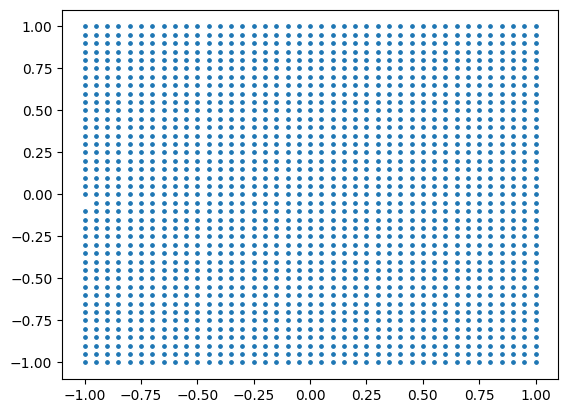

In [5]:


Model = VAE_Solver(config,diffusion_steps = config.diffusion_steps,num_var = config.num_var,deg = config.deg,latent_size = config.latent_size).to(config.device)


problem = ContextProblem(testing_num = config.evaluation_num ,variation = config.variation,num_var = config.num_var,deg = config.deg)

train(Model, config,problem,run_id = run_id)